*installing the necessary libraries*

In [1]:
!pip install pandas matplotlib scikit-learn seaborn xgboost -q

*Import necessary libraries*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

*importing the dataset*

In [3]:
# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
# Data Exploration
train_data.head()

,patient_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,glucose_test,insulin_change,diabetes_drug_1,diabetes_drug_2,medication_change,followup,opted
0,75148425,Female,[60-70),8.0,53.0,3.0,31.0,9.0,NaN,Down,No,No,Yes,No,Yes
1,160958849,Male,[20-30),6.0,3.0,0.0,8.0,7.0,NaN,No,No,No,No,No,No
2,89060535,Male,[70-80),3.0,28.0,1.0,14.0,9.0,NaN,No,No,No,Yes,Yes,Yes
3,5995206,Male,[60-70),2.0,39.0,1.0,10.0,9.0,NaN,Down,No,No,Yes,Yes,Yes
4,71726355,Female,[80-90),1.0,2.0,1.0,10.0,6.0,NaN,No,No,No,No,No,Yes


In [5]:
train_data.info() # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          8000 non-null   int64  
 1   gender              8000 non-null   object 
 2   age                 8000 non-null   object 
 3   time_in_hospital    7682 non-null   float64
 4   num_lab_procedures  7616 non-null   float64
 5   num_procedures      7403 non-null   float64
 6   num_medications     7688 non-null   float64
 7   number_diagnoses    7732 non-null   float64
 8   glucose_test        382 non-null    object 
 9   insulin_change      8000 non-null   object 
 10  diabetes_drug_1     8000 non-null   object 
 11  diabetes_drug_2     8000 non-null   object 
 12  medication_change   8000 non-null   object 
 13  followup            8000 non-null   object 
 14  opted               8000 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 937.6+

In [6]:
train_data.describe()  # Statistical summary of numerical features

,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses
count,8.000000e+03,7682.000000,7616.000000,7403.000000,7688.000000,7732.000000
mean,5.448525e+07,4.407967,42.883403,1.348372,16.028746,7.431066
std,3.880233e+07,3.044765,19.501201,1.725508,8.134573,1.935456
min,5.220000e+03,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.342822e+07,2.000000,32.000000,0.000000,10.000000,6.000000
50%,4.545385e+07,4.000000,44.000000,1.000000,15.000000,8.000000
75%,8.835727e+07,6.000000,57.000000,2.000000,20.000000,9.000000
max,1.892578e+08,14.000000,113.000000,6.000000,67.000000,16.000000


*Visualize distributions*

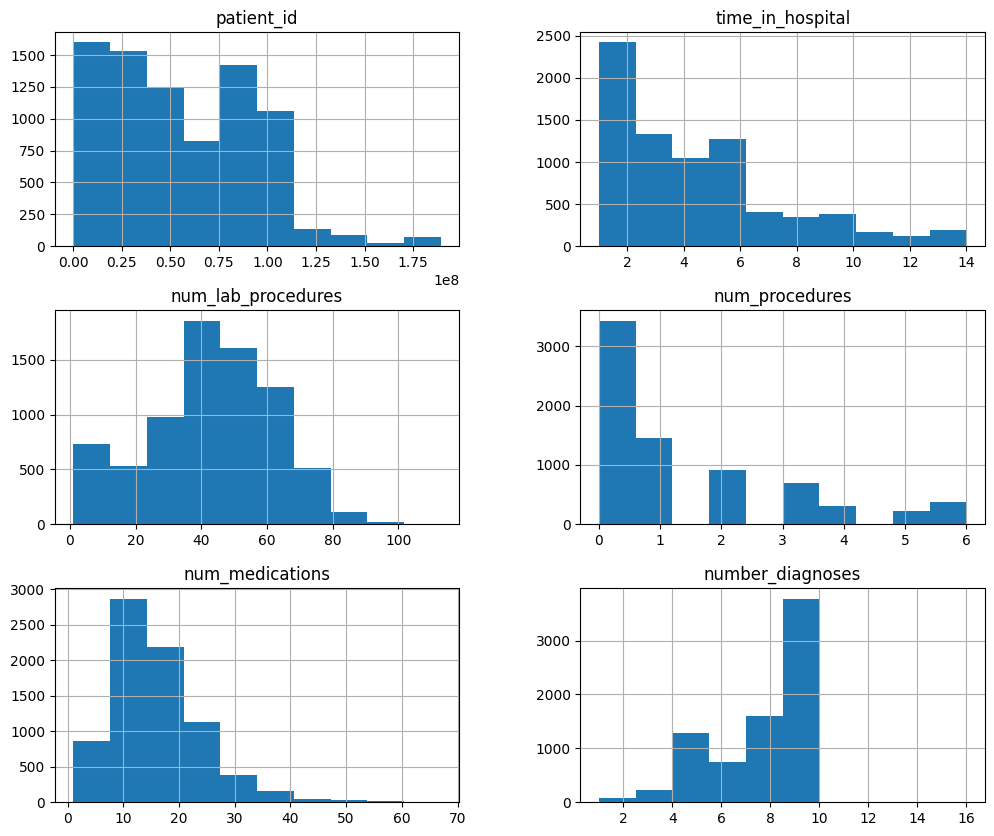

In [7]:
train_data.hist(figsize=(12, 10))
plt.show()

In [8]:
train_data.head(3)

,patient_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,glucose_test,insulin_change,diabetes_drug_1,diabetes_drug_2,medication_change,followup,opted
0,75148425,Female,[60-70),8.0,53.0,3.0,31.0,9.0,NaN,Down,No,No,Yes,No,Yes
1,160958849,Male,[20-30),6.0,3.0,0.0,8.0,7.0,NaN,No,No,No,No,No,No
2,89060535,Male,[70-80),3.0,28.0,1.0,14.0,9.0,NaN,No,No,No,Yes,Yes,Yes


# Data Cleaning & Feature Engineering

In [9]:
def get_age_range(age_data):
    """
    Transforming & extracting age range.

    :param: <str> data of "age" column from train df
        age_data:[60-70)
    :returns: <list>
        [60, 70]
    """
    return [int(age) for age in age_data.replace("[", "").replace(")", "").split('-')]

In [10]:
# sampling the function
get_age_range(age_data=train_data.iloc[0]['age'])

[60, 70]

<h4>creating age feature as two columns to make the data more meaningful for the model to train on.</h4>

In [11]:
train_data[['age_start_range', 'age_end_range']] = train_data['age'].apply(lambda x: pd.Series(get_age_range(x)))

In [12]:
train_data.head(3)

,patient_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,glucose_test,insulin_change,diabetes_drug_1,diabetes_drug_2,medication_change,followup,opted,age_start_range,age_end_range
0,75148425,Female,[60-70),8.0,53.0,3.0,31.0,9.0,NaN,Down,No,No,Yes,No,Yes,60,70
1,160958849,Male,[20-30),6.0,3.0,0.0,8.0,7.0,NaN,No,No,No,No,No,No,20,30
2,89060535,Male,[70-80),3.0,28.0,1.0,14.0,9.0,NaN,No,No,No,Yes,Yes,Yes,70,80


In [13]:
# doing same for the test data
test_data[['age_start_range', 'age_end_range']] = test_data['age'].apply(lambda x: pd.Series(get_age_range(x)))

In [14]:
train_data['gender'].value_counts()

gender
Female    4339
Male      3661
Name: count, dtype: int64

<h2>
    Converting categorial data
</h2>

* converting categorial data to numeric format so that model can be train on the pattern.

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender', 'insulin_change', 'diabetes_drug_1', 'diabetes_drug_2', 'medication_change', 'followup', 'opted']

# Fit and transform on the training data for each column
for column in columns_to_encode:
    label_encoder.fit(train_data[column])
    train_data[f'{column}_encoded'] = label_encoder.transform(train_data[column])
    if column != 'opted':
        test_data[f'{column}_encoded'] = label_encoder.transform(test_data[column])


<h4>
    Dropping the columns that are being converted to the encoded.
</h4>

In [16]:
train_data.drop(columns=['patient_id', 'age', 'gender', 'insulin_change', 'diabetes_drug_1', \
                         'diabetes_drug_2', 'medication_change', 'followup', 'opted'],
                axis=1,
                inplace=True)

test_data.drop(columns=['age','gender', 'insulin_change', 'diabetes_drug_1', \
                         'diabetes_drug_2', 'medication_change', 'followup'],
                axis=1,
                inplace=True)

In [17]:
train_data.head(3)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,glucose_test,age_start_range,age_end_range,gender_encoded,insulin_change_encoded,diabetes_drug_1_encoded,diabetes_drug_2_encoded,medication_change_encoded,followup_encoded,opted_encoded
0,8.0,53.0,3.0,31.0,9.0,NaN,60,70,0,0,1,1,1,0,1
1,6.0,3.0,0.0,8.0,7.0,NaN,20,30,1,1,1,1,0,0,0
2,3.0,28.0,1.0,14.0,9.0,NaN,70,80,1,1,1,1,1,1,1


In [18]:
def fill_mode(df, col_name):
    """
    Fill missing values with the mode
    """
    mode_value = df[col_name].mode()[0]
    df[col_name].fillna(mode_value, inplace=True)
    return df

In [19]:
print('null values: ', sum(train_data['glucose_test'].isnull()), ' out of :', len(train_data))

null values:  7618  out of : 8000


In [20]:
missing_percentage = (7618 / 8000) * 100
missing_percentage

95.22500000000001

<h4>
    <ul>
        <li>
            As being observed <u>glucose_test</u> has more than 95% data is missing, due to this we're not considering this column,so we're dropping it.
        </li>
        <br>
        <br>
        <li>
        Because if we impute and this feature to train the model then it will decrease the accuracy of the model.
        </li>
    </ul>
    
    
</h4>


In [21]:
train_data.drop(columns=['glucose_test'], axis=1, inplace=True)

In [22]:
test_data.drop(columns=['glucose_test'], axis=1, inplace=True)

In [23]:
train_data.isnull().sum()

time_in_hospital             318
num_lab_procedures           384
num_procedures               597
num_medications              312
number_diagnoses             268
age_start_range                0
age_end_range                  0
gender_encoded                 0
insulin_change_encoded         0
diabetes_drug_1_encoded        0
diabetes_drug_2_encoded        0
medication_change_encoded      0
followup_encoded               0
opted_encoded                  0
dtype: int64

### As being observed in above cell we do have a lot of null values in the dataset.

<h4>
    <i>that we need to impute with relevance impute functions</i>
</h4>



In [24]:
train_data['time_in_hospital'].min(), train_data['time_in_hospital'].max()

(1.0, 14.0)

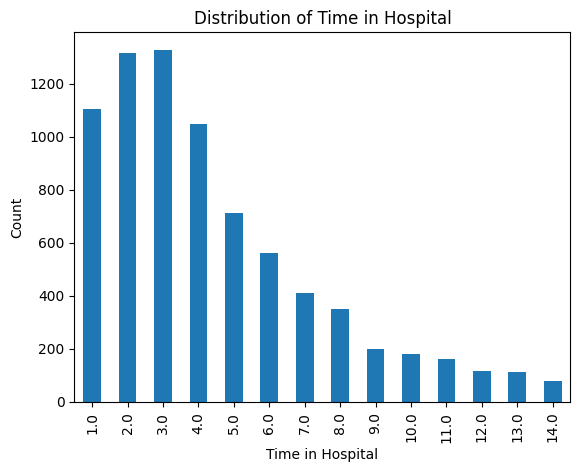

In [25]:
import matplotlib.pyplot as plt

train_data['time_in_hospital'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.title('Distribution of Time in Hospital')
plt.show()

In [26]:
# we have less variation for  time_in_hospital column so we're considering "mode" to fill in the null data
train_data = fill_mode(df=train_data, col_name='time_in_hospital')
train_data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,age_start_range,age_end_range,gender_encoded,insulin_change_encoded,diabetes_drug_1_encoded,diabetes_drug_2_encoded,medication_change_encoded,followup_encoded,opted_encoded
0,8.0,53.0,3.0,31.0,9.0,60,70,0,0,1,1,1,0,1
1,6.0,3.0,0.0,8.0,7.0,20,30,1,1,1,1,0,0,0
2,3.0,28.0,1.0,14.0,9.0,70,80,1,1,1,1,1,1,1
3,2.0,39.0,1.0,10.0,9.0,60,70,1,0,1,1,1,1,1
4,1.0,2.0,1.0,10.0,6.0,80,90,0,1,1,1,0,0,1


In [27]:
train_data['time_in_hospital'].isnull().sum()  # all the null value is being imputed

0

In [28]:
# doing same for the test_data
test_data = fill_mode(df=test_data, col_name='time_in_hospital')

#### filling NaN values for "num_lab_procedures" with meaningful data

In [29]:
train_data['num_lab_procedures'].value_counts()

num_lab_procedures
1.0      247
44.0     207
43.0     201
45.0     193
40.0     171
        ... 
98.0       1
109.0      1
102.0      1
113.0      1
101.0      1
Name: count, Length: 106, dtype: int64

* for this we're considering the mean to impute the NaN values

In [30]:
mean_value = train_data['num_lab_procedures'].mean()
train_data['num_lab_procedures'].fillna(mean_value, inplace=True)

In [31]:
mean_value = test_data['num_lab_procedures'].mean()
test_data['num_lab_procedures'].fillna(mean_value, inplace=True)

In [32]:
train_data['num_medications'].value_counts()

num_medications
13.0    479
14.0    472
11.0    426
10.0    425
15.0    422
       ... 
59.0      2
58.0      1
66.0      1
61.0      1
51.0      1
Name: count, Length: 64, dtype: int64

In [33]:
mean_value = train_data['num_medications'].mean()
train_data['num_medications'].fillna(mean_value, inplace=True)

In [34]:
mean_value = test_data['num_medications'].mean()
test_data['num_medications'].fillna(mean_value, inplace=True)

<h4>
    As seen in below cell number_diagnoses , the value 9 holds more weightage so we'll consider mode for this feature to fill in the null data.</h4>

In [35]:
train_data['number_diagnoses'].value_counts()

number_diagnoses
9.0     3778
5.0      852
8.0      805
7.0      800
6.0      748
4.0      429
3.0      226
2.0       69
1.0       17
16.0       5
12.0       1
15.0       1
11.0       1
Name: count, dtype: int64

In [36]:
train_data= fill_mode(df=train_data, col_name='number_diagnoses')

In [37]:
test_data= fill_mode(df=test_data, col_name='number_diagnoses')

<h4>
    imputing <u>mean</u> for featuer num_procedures.
</h4>

In [38]:
train_data['num_procedures'].value_counts()

num_procedures
0.0    3436
1.0    1451
2.0     911
3.0     688
6.0     373
4.0     313
5.0     231
Name: count, dtype: int64

In [39]:
mean_value = train_data['num_procedures'].mean()
train_data['num_procedures'].fillna(mean_value, inplace=True)

In [40]:
mean_value = test_data['num_procedures'].mean()
test_data['num_procedures'].fillna(mean_value, inplace=True)

* checking for null values at last.

In [41]:
train_data.isnull().sum()

time_in_hospital             0
num_lab_procedures           0
num_procedures               0
num_medications              0
number_diagnoses             0
age_start_range              0
age_end_range                0
gender_encoded               0
insulin_change_encoded       0
diabetes_drug_1_encoded      0
diabetes_drug_2_encoded      0
medication_change_encoded    0
followup_encoded             0
opted_encoded                0
dtype: int64

<h4>
we've 0 null value for all the feature.    
</h4>

In [42]:
test_data.isnull().sum()

patient_id                   0
time_in_hospital             0
num_lab_procedures           0
num_procedures               0
num_medications              0
number_diagnoses             0
age_start_range              0
age_end_range                0
gender_encoded               0
insulin_change_encoded       0
diabetes_drug_1_encoded      0
diabetes_drug_2_encoded      0
medication_change_encoded    0
followup_encoded             0
dtype: int64

# Heatmap of correlation

<h4>
    Checking which feature has more correlation with target variable "opted".
</h4>

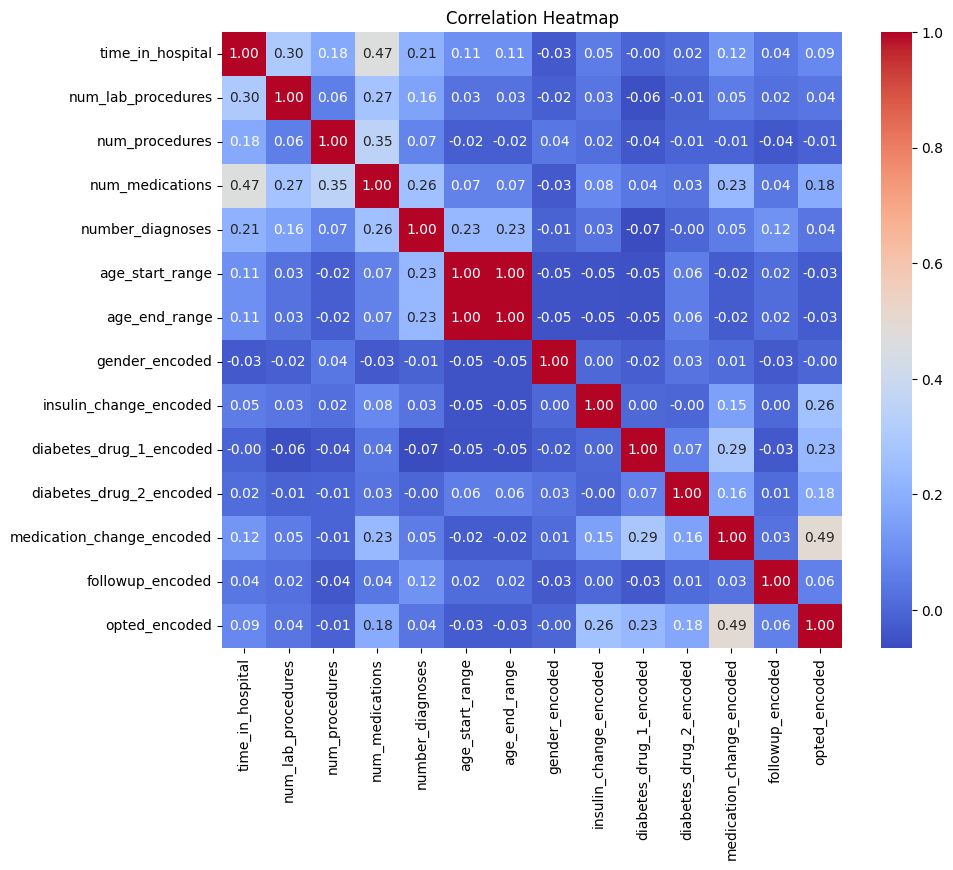

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'opted_encoded' is the encoded target variable column in the correlation matrix
corr_matrix = train_data.corr()

# Check correlation with target variable ('opted_encoded')
correlation_with_target = corr_matrix['opted_encoded'].sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [44]:
correlation_scores = train_data.corr()['opted_encoded']
print("Correlation Scores for 'opted_encoded':")
print(correlation_scores)

Correlation Scores for 'opted_encoded':
time_in_hospital             0.086308
num_lab_procedures           0.036026
num_procedures              -0.012944
num_medications              0.184567
number_diagnoses             0.036687
age_start_range             -0.027507
age_end_range               -0.027507
gender_encoded              -0.002727
insulin_change_encoded       0.264072
diabetes_drug_1_encoded      0.232215
diabetes_drug_2_encoded      0.175369
medication_change_encoded    0.494141
followup_encoded             0.064342
opted_encoded                1.000000
Name: opted_encoded, dtype: float64


<h4> time_in_hospital feature has much more influence on the target variable "opted"</h4>

In [45]:
train_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,age_start_range,age_end_range,gender_encoded,insulin_change_encoded,diabetes_drug_1_encoded,diabetes_drug_2_encoded,medication_change_encoded,followup_encoded,opted_encoded
0,8.0,53.0,3.000000,31.0,9.0,60,70,0,0,1,1,1,0,1
1,6.0,3.0,0.000000,8.0,7.0,20,30,1,1,1,1,0,0,0
2,3.0,28.0,1.000000,14.0,9.0,70,80,1,1,1,1,1,1,1
3,2.0,39.0,1.000000,10.0,9.0,60,70,1,0,1,1,1,1,1
4,1.0,2.0,1.000000,10.0,6.0,80,90,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5.0,44.0,3.000000,19.0,7.0,50,60,0,2,1,1,0,1,1
7996,3.0,35.0,0.000000,10.0,4.0,80,90,1,2,1,1,0,1,1
7997,8.0,47.0,0.000000,25.0,9.0,60,70,1,2,1,1,0,0,1
7998,11.0,45.0,2.000000,26.0,9.0,40,50,0,3,1,1,1,0,1


## Scaling numerical feature, in specific range.

In [46]:
from sklearn.preprocessing import MinMaxScaler

def scale_and_drop(data):
    # Specify the columns to be scaled and dropped
    columns_to_scale_and_drop = ['number_diagnoses', 'num_lab_procedures', 'num_medications', 'age_start_range', \
                                'age_end_range', 'time_in_hospital']

    # Create a MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the selected columns
    data[columns_to_scale_and_drop] = scaler.fit_transform(data[columns_to_scale_and_drop])

    # Drop the scaled columns
    # data.drop(columns=columns_to_scale_and_drop, inplace=True)

    return data

# Assuming train_data and test_data are your DataFrames
train_data = scale_and_drop(train_data)
test_data = scale_and_drop(test_data)


In [47]:
train_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,age_start_range,age_end_range,gender_encoded,insulin_change_encoded,diabetes_drug_1_encoded,diabetes_drug_2_encoded,medication_change_encoded,followup_encoded,opted_encoded
0,0.538462,0.464286,3.000000,0.454545,0.533333,0.666667,0.666667,0,0,1,1,1,0,1
1,0.384615,0.017857,0.000000,0.106061,0.400000,0.222222,0.222222,1,1,1,1,0,0,0
2,0.153846,0.241071,1.000000,0.196970,0.533333,0.777778,0.777778,1,1,1,1,1,1,1
3,0.076923,0.339286,1.000000,0.136364,0.533333,0.666667,0.666667,1,0,1,1,1,1,1
4,0.000000,0.008929,1.000000,0.136364,0.333333,0.888889,0.888889,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.307692,0.383929,3.000000,0.272727,0.400000,0.555556,0.555556,0,2,1,1,0,1,1
7996,0.153846,0.303571,0.000000,0.136364,0.200000,0.888889,0.888889,1,2,1,1,0,1,1
7997,0.538462,0.410714,0.000000,0.363636,0.533333,0.666667,0.666667,1,2,1,1,0,0,1
7998,0.769231,0.392857,2.000000,0.378788,0.533333,0.444444,0.444444,0,3,1,1,1,0,1


# Model Training

In [48]:
X = train_data.drop(['opted_encoded'], axis=1)

In [49]:
y = train_data['opted_encoded']

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

val_predictions = rf_model.predict(X_val)

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions)
print(f"Accuracy on validation set: {accuracy}")

Accuracy on validation set: 0.9175


# Accuracy achived 91.75 using Random forest.

In [52]:
test_predictions = rf_model.predict(test_data.drop(columns=['patient_id'], axis=1))
test_predictions

array([1, 1, 1, ..., 0, 1, 1])

In [53]:
submission_df = pd.DataFrame({'id': test_data['patient_id'], 'opted_prediction': test_predictions})

In [54]:
submission_df.head()

,id,opted_prediction
0,111023406,1
1,90160929,1
2,23948163,1
3,15767055,0
4,23483583,1


In [56]:
submission_df.to_csv('submission.csv', index=False)

# Training Deep Learning Model

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [210]:
X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/50
200/200 [==============================] - 3s 8ms/step - loss: 0.3725 - accuracy: 0.8014 - val_loss: 0.2565 - val_accuracy: 0.8594
Epoch 2/50
200/200 [==============================] - 2s 9ms/step - loss: 0.2316 - accuracy: 0.8888 - val_loss: 0.1985 - val_accuracy: 0.9062
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 0.1943 - accuracy: 0.9131 - val_loss: 0.1815 - val_accuracy: 0.9269
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1836 - accuracy: 0.9167 - val_loss: 0.1730 - val_accuracy: 0.9281
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 0.1765 - accuracy: 0.9192 - val_loss: 0.1643 - val_accuracy: 0.9281
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 0.1748 - accuracy: 0.9206 - val_loss: 0.1624 - val_accuracy: 0.9281
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.1749 - accuracy: 0.9186 - val_loss: 0.1610 - val_accuracy: 0.9287
Epoch 

# Accuracy archived 92.81 using Deep Learning

### Plotting training and validation Accuracy & Loss

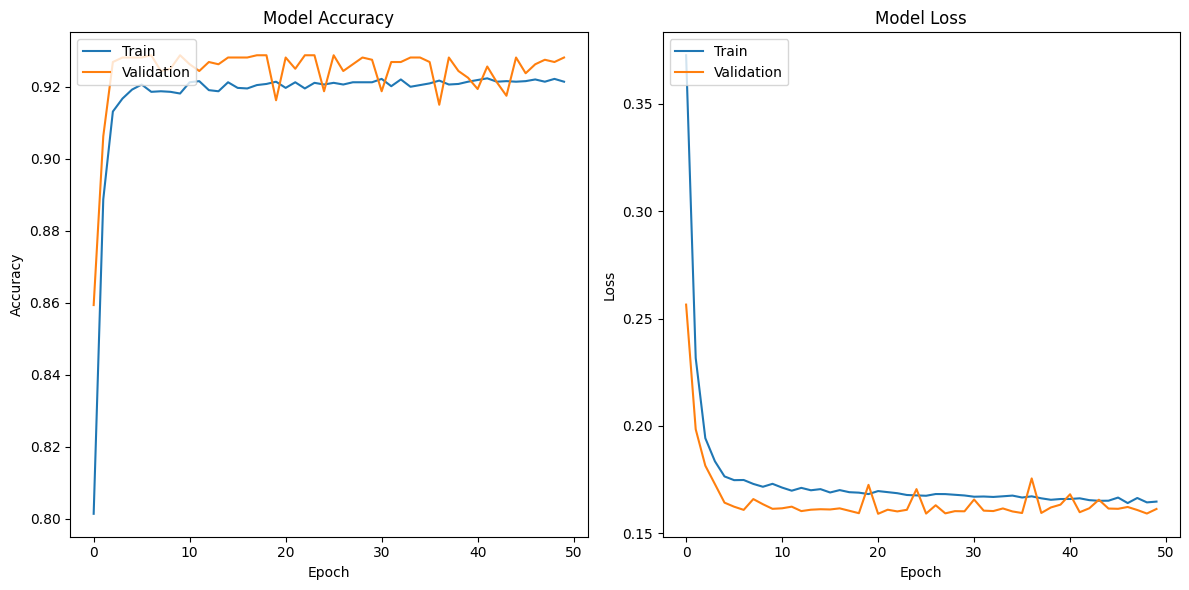

In [211]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [212]:
predictions=model.predict(test_data.drop(columns=['patient_id'], axis=1))

63/63 [==============================] - 0s 1ms/step


In [215]:
threshold = 0.5 # using threshold to find label 
predictions = (predictions >= threshold).astype(int)
predictions = predictions.flatten()
print(predictions)

[1 1 1 ... 0 1 1]


In [216]:
dl_model_df = pd.DataFrame({'id': test_data['patient_id'], 'opted_prediction': predictions})

In [220]:
dl_model_df.head()

,id,opted_prediction
0,111023406,1
1,90160929,1
2,23948163,1
3,15767055,0
4,23483583,1


In [222]:
submission_df.to_csv('dl_model_submission.csv', index=False)